# Data Mining Lab1
Delivered by:

1. **Amr Mohamed Fathy Hendy (46)**
2. **Abdelrhman Yasser (37)**

## Cosine Similarity Calculation

## Using Libraries

In [112]:
from sklearn import datasets
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

iris = datasets.load_iris()
X = iris.data
Y = iris.target
X = X.transpose()
similarities = cosine_similarity(X)
print('Pairwise Similarity output: \n {} \n'.format(similarities))

Pairwise Similarity output: 
 [[1.         0.97826314 0.9485315  0.89734594]
 [0.97826314 1.         0.87186713 0.80926193]
 [0.9485315  0.87186713 1.         0.98338483]
 [0.89734594 0.80926193 0.98338483 1.        ]] 



## From Scratch

In [113]:
# Trying Cosine Similarity from scratch to ensure correct output of library
from numpy.linalg import norm
cosine = []
for f1 in X:
  cosine.append([np.dot(f1,f2) / (norm(f1) * norm(f2)) for f2 in X])
cosine = np.asmatrix(cosine)
print(cosine)

[[1.         0.97826314 0.9485315  0.89734594]
 [0.97826314 1.         0.87186713 0.80926193]
 [0.9485315  0.87186713 1.         0.98338483]
 [0.89734594 0.80926193 0.98338483 1.        ]]


## Heatmap Visualization

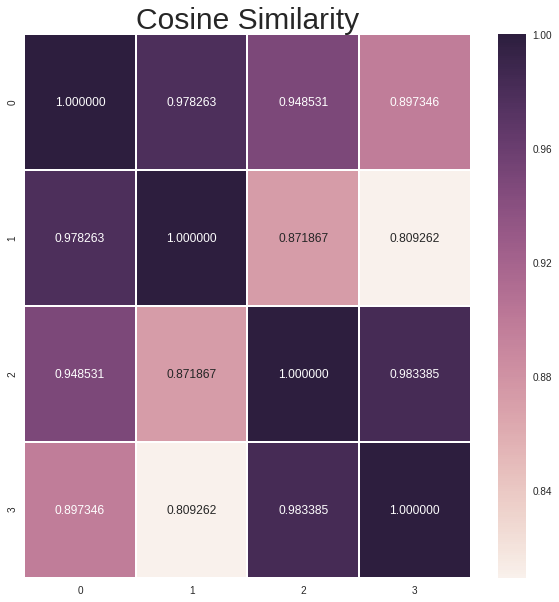

In [114]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 1,figsize=(10, 10))
axes.set_title('Cosine Similarity', {'fontsize' : 30})
sns.heatmap(cosine, ax=axes, annot=True, fmt="f", linewidths=1)
plt.show()

# DataFrame Creation

In [115]:
import pandas as pd
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [116]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Plotting X data

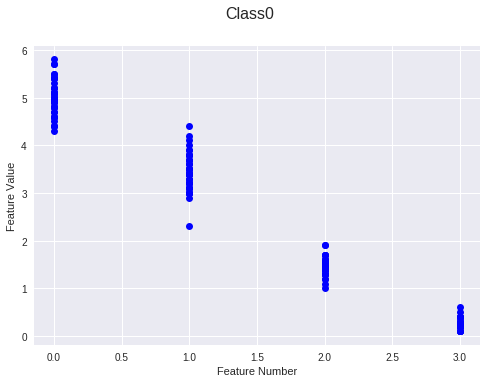

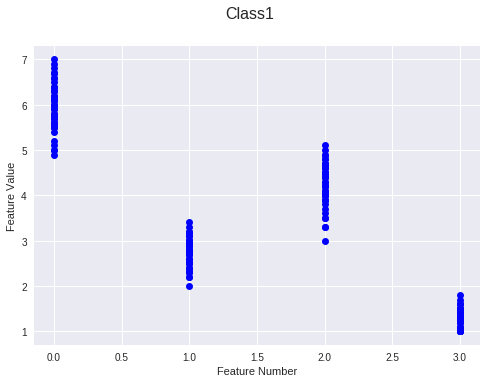

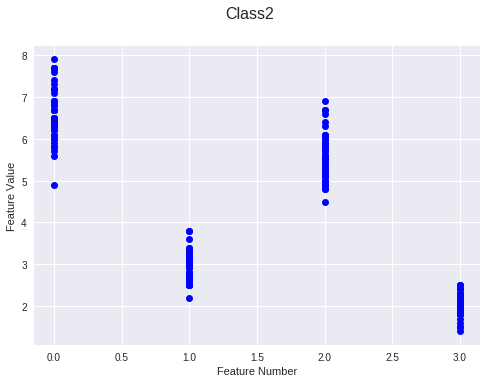

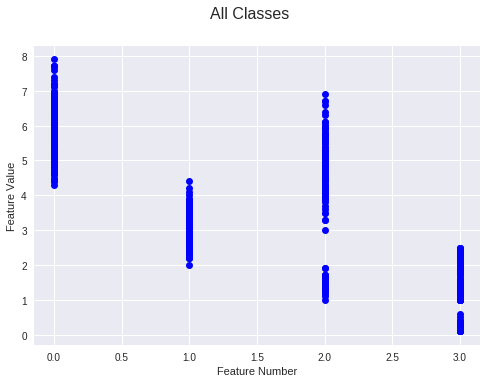

In [117]:
def plot_data(x_data, y_data, x_title, y_title, title):
  fig = plt.figure()
  plt.plot(x_data, y_data, 'bo')
  fig.suptitle(title, fontsize=16)
  plt.xlabel(x_title)
  plt.ylabel(y_title)
  plt.show()
  return

classes_values = np.unique(iris['target'])
feature_names = ["sepal length", "sepal width", "petal length", "petal width"]
all_x = []
all_y = []
# plotting each class alone
for class_val in classes_values:
  # making feature points
  x = []
  y = []
  for i in range(len(feature_names)):
    feature_values = list(iris_df[iris_df['target'] == class_val].iloc[:, i])
    y = y + feature_values
    x = x + [i] * len(feature_values)
  all_x = all_x + x
  all_y = all_y + y
  plot_data(x, y, 'Feature Number', 'Feature Value', 'Class' + str(class_val))

# plotting all classes together
plot_data(all_x, all_y, 'Feature Number', 'Feature Value', 'All Classes')

# 2D Scatter

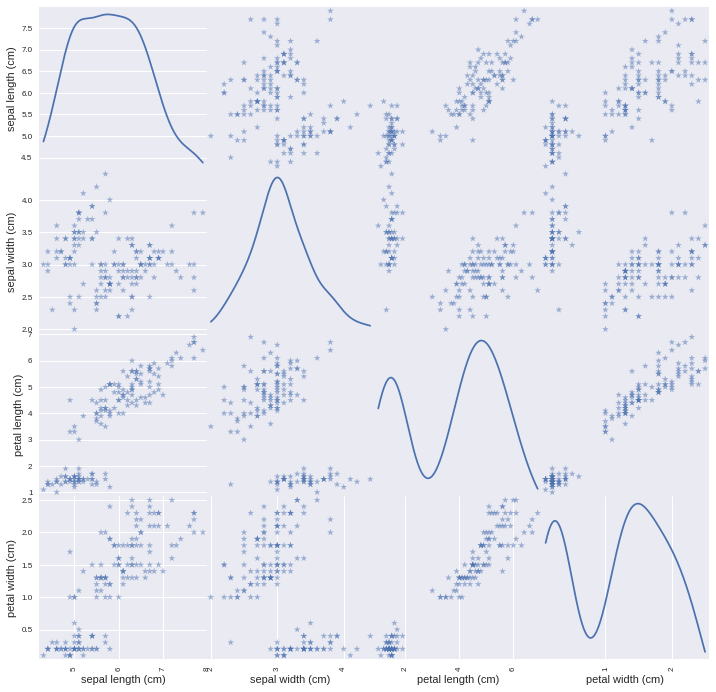

In [118]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
# scatter plot matrix
scatter_matrix(iris_df.iloc[:,:-1], figsize=[12, 12], grid=True, marker='*', diagonal = 'kde')
plt.show()

# 3D Scatter

Feature Names = [2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2.0, 1.9, 2.1, 2.0, 2.4, 2.3, 1.8, 2.2, 2.3, 1.5, 2.3, 2.0, 2.0, 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6, 1.9, 2.0, 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9, 2.3, 2.5, 2.3, 1.9, 2.0, 2.3, 1.8] 



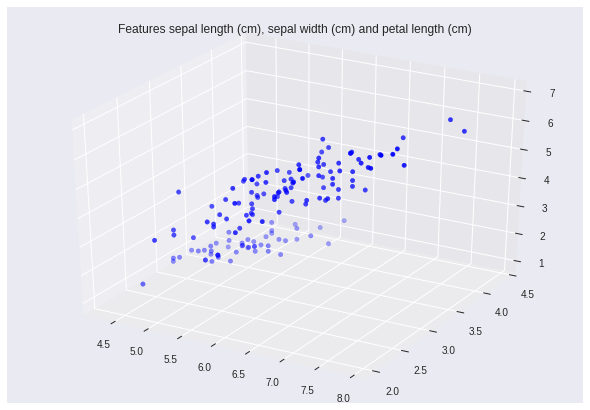

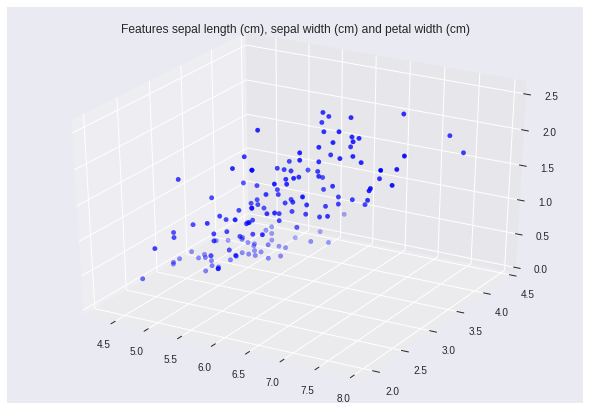

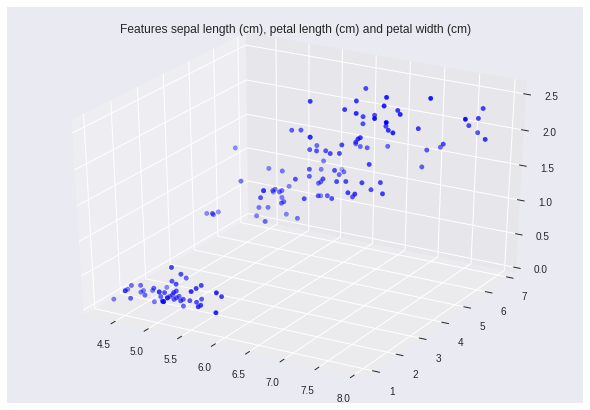

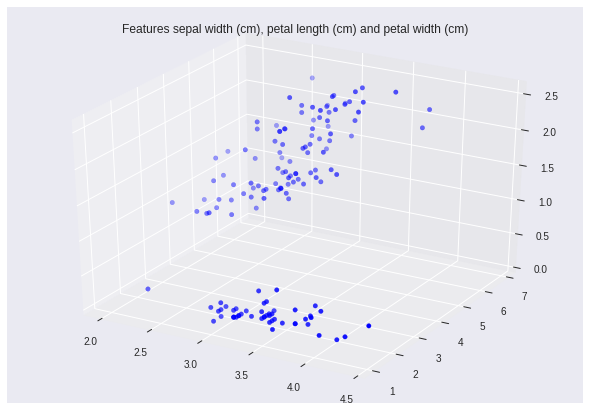

In [119]:
from mpl_toolkits.mplot3d import Axes3D

# all 3 combination of features can be selected
feature_combinations = [[0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3]]
feature_names = iris['feature_names']
print("Feature Names = {} \n".format(feature_values))
for comb in feature_combinations:
  f1 = iris_df[feature_names[comb[0]]]
  f2 = iris_df[feature_names[comb[1]]]
  f3 = iris_df[feature_names[comb[2]]]
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.set_title("Features {}, {} and {}".format(feature_names[comb[0]], feature_names[comb[1]], feature_names[comb[2]]))
  ax.scatter(f1, f2, f3,c='b')
  plt.show()    

# Histogram

In [0]:
def plot_histogram(feature, name ): 
  n, bins, patches = plt.hist(x=feature, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
  plt.grid(axis='y', alpha=0.75)
  plt.xlabel(name)
  plt.ylabel('Frequency')
  maxfreq = n.max()
  # Set a clean upper y-axis limit.
  plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
  plt.show()
  return 

In [0]:
def plot_histogram_class (data) :
  feature_names = ["sepal length", "sepal width", "petal length", "petal width"]
  # plot feature histogram to show the feature distribution
  for i in range(len(feature_names)):
    plot_histogram (data.iloc[:, i], feature_names[i])
  return

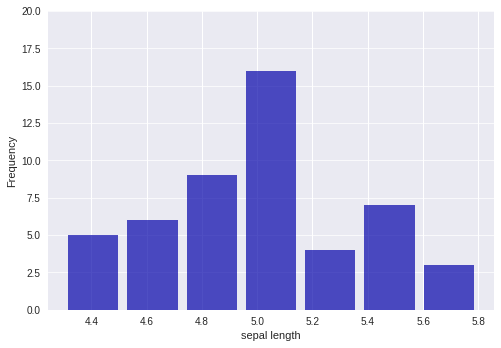

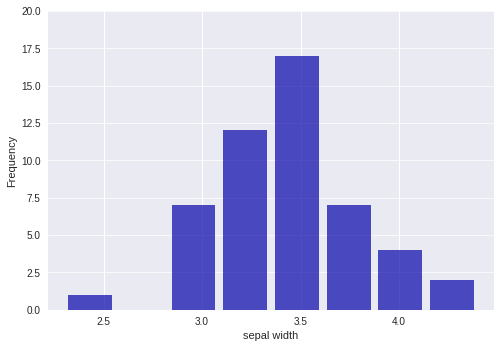

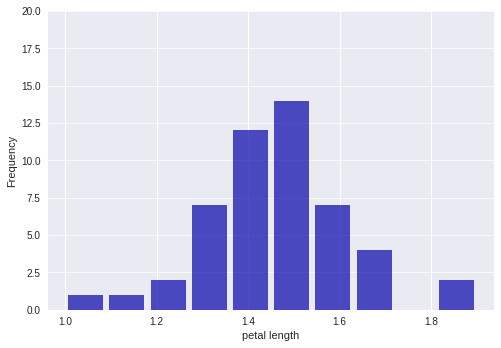

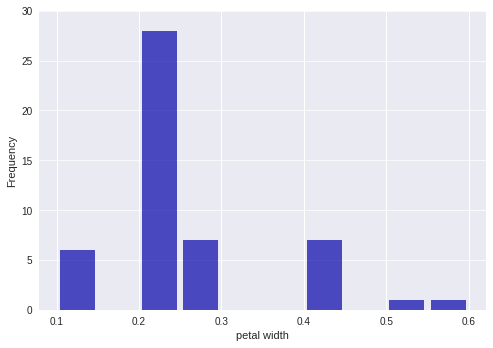

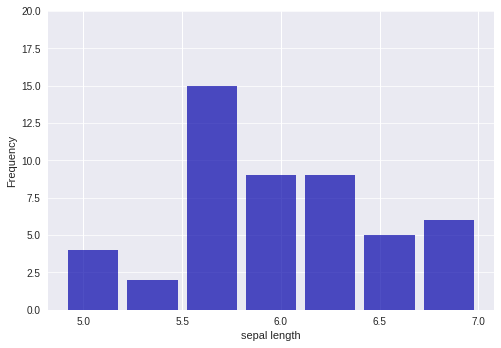

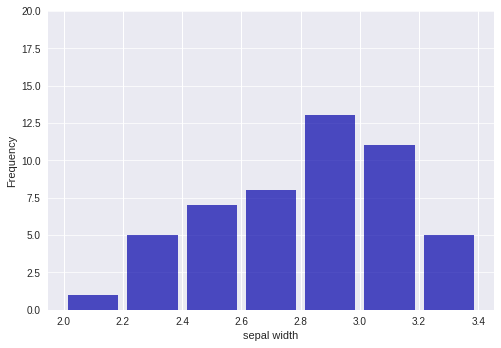

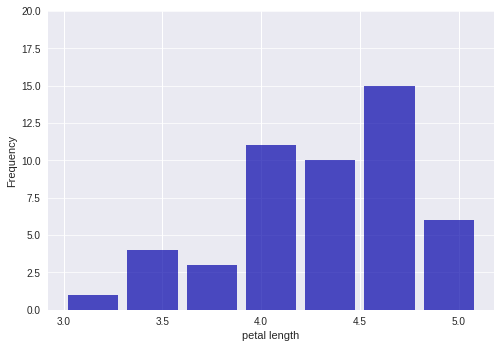

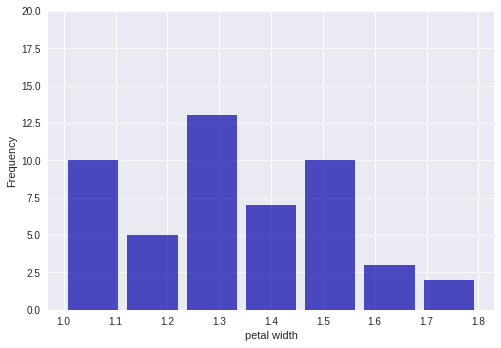

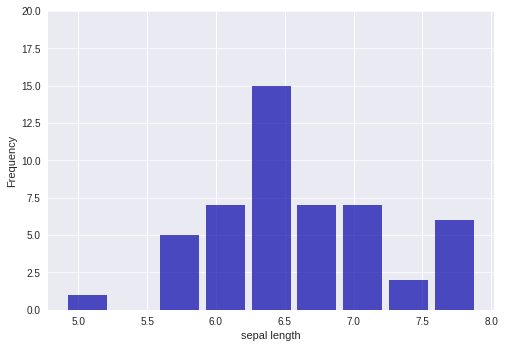

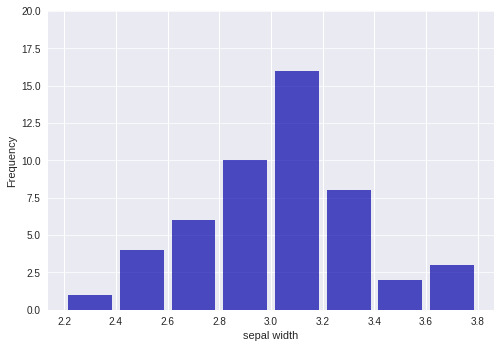

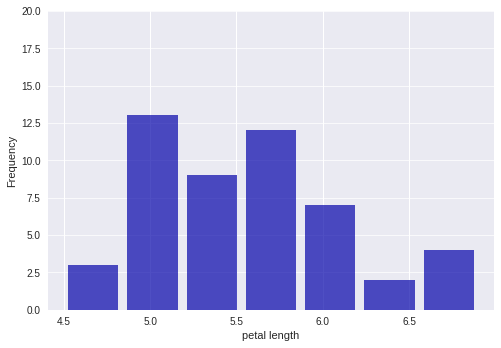

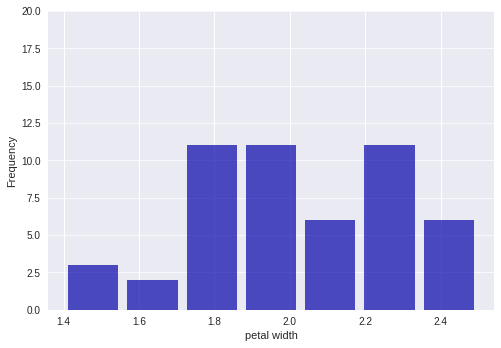

In [122]:
classes_values = np.unique(iris['target'])
# plotting each class histograms
for class_val in classes_values:
  plot_histogram_class(iris_df[iris_df['target'] == class_val])    